In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [2]:
result_path = "/home/rohan/Local/datasets/human_mtg_azimuth_eval/"
df = pd.read_csv(result_path+'donorwise_subclass_metrics.csv', index_col=0)

cat_type = CategoricalDtype(categories=sorted(df['label'].unique().tolist()), ordered=True)
df['label'] = df['label'].astype(cat_type)

cat_type = CategoricalDtype(categories=sorted(df['donor'].unique().tolist()), ordered=True)
df['donor'] = df['donor'].astype(cat_type)

df = df[df.support > 0]
df.reset_index(drop=True, inplace=True)

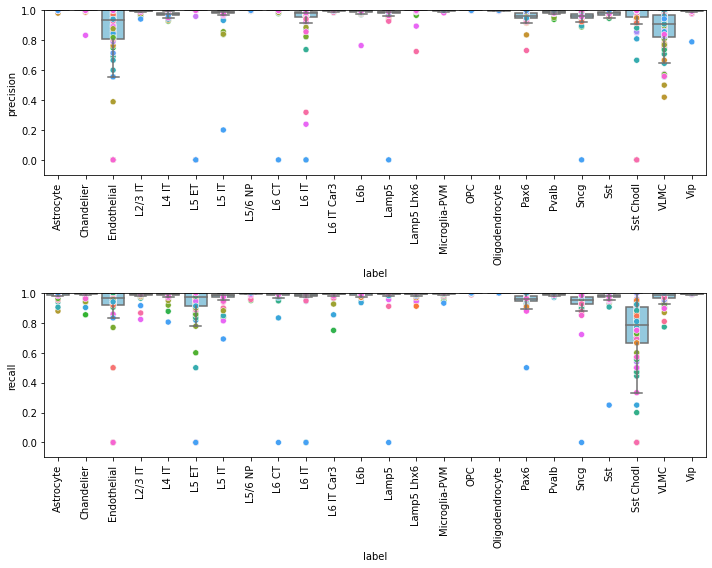

In [3]:
donor_list = df['donor'].unique()[0:]
f,ax = plt.subplots(2,1,figsize=(10,8))
d = df.loc[df['donor'].isin(donor_list)]
sns.boxplot(x='label',y='precision', data=d, ax=ax[0], order=None, hue_order=None, orient=None, color='skyblue', fliersize=0)
sns.scatterplot(x='label',y='precision', data=d, ax=ax[0], hue='donor')
ax[0].legend_.remove()
ax[0].tick_params(axis='x', labelrotation=90)
ax[0].set(ylim=(-0.1,1))

sns.boxplot(x='label',y='recall', data=d, ax=ax[1], order=None, hue_order=None, orient=None, color='skyblue', fliersize=0)
sns.scatterplot(x='label',y='recall', data=d, ax=ax[1], hue='donor')
ax[1].legend_.remove()
ax[1].tick_params(axis='x', labelrotation=90)
ax[1].set(ylim=(-0.1,1))
plt.tight_layout()
plt.show()

In [4]:
d = df.loc[(df['recall']<=0.5).values | (df['precision']<=0.5).values].sort_values(by='label').reset_index(drop=True)
d

,label,precision,recall,f1,support,donor
0,Endothelial,0.000000,0.000000,0.000000,1,H20.33.024
1,Endothelial,0.000000,0.000000,0.000000,4,H20.33.014
2,Endothelial,0.388889,1.000000,0.560000,14,H20.33.025
3,Endothelial,0.000000,0.000000,0.000000,2,H21.33.016
4,Endothelial,0.000000,0.000000,0.000000,3,H20.33.029
5,Endothelial,0.000000,0.000000,0.000000,1,H21.33.006
6,Endothelial,0.000000,0.000000,0.000000,2,H21.33.039
7,Endothelial,0.000000,0.000000,0.000000,2,H21.33.036
8,Endothelial,1.000000,0.500000,0.666667,4,H20.33.026
9,Endothelial,1.000000,0.500000,0.666667,4,H20.33.002


In [5]:
d = d['donor'].value_counts().to_frame()
print(f'Number of unique donors with discrepancies: {d.loc[d["donor"]>0].shape[0]}')
d.loc[d['donor']>0]

Number of unique donors with discrepancies: 29


,donor
H21.33.020,8
H21.33.045,3
H20.33.024,2
H20.33.029,2
H21.33.034,2
H21.33.008,2
H20.33.026,2
H20.33.033,1
H21.33.001,1
H20.33.038,1
